March 16th, 2025

## Reduced QLT hot + cold electron whistler compare with [Elana Fini Thesis](https://webthesis.biblio.polito.it/14782/)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import wofz 
import scipy

In [2]:
%matplotlib inline
import matplotlib
font = {'family' : 'serif',
        'size'   : 14}

matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 

In [3]:
def Z(xi):
    # plasma dispersion function
    return 1j * np.sqrt(np.pi) * wofz(xi)

### QLT equations
\begin{align*}
    \frac{\mathrm{d}\beta_{\perp c}}{\mathrm{d} \tau} &= -2 \int_{0}^{\infty} \frac{\mathcal{E}(q, \tau)}{q^2} \left((2A_{c} + 1)\mathrm{Im}\{z\} + \mathrm{Im}\{(2 i \mathrm{Im}\{z\} -1)\eta_{c}Z(\xi_{c}^{1}) \} \right), \\ 
    \frac{\mathrm{d}\beta_{\| c}}{\mathrm{d} \tau} &= 4 \int_{0}^{\infty} \frac{\mathcal{E}(q, \tau)}{q^2} \left( (A_{c} + 1) \mathrm{Im}\{z\} + \mathrm{Im} \{(z-1) \eta_{c} Z(\xi_{c}^{1})  \} \right) \mathrm{d} q,\\
    \frac{\mathrm{d}\beta_{\perp h}}{\mathrm{d} \tau} &=-2 \int_{0}^{\infty} \frac{\mathcal{E}(q, \tau)}{q^2} \left((2A_{h} + 1)\mathrm{Im}\{z\} + \mathrm{Im}\{(2 i \mathrm{Im}\{z\} -1)\eta_{h}Z(\xi_{h}^{1}) \} \right), \\
     \frac{\mathrm{d}\beta_{\| h}}{\mathrm{d} \tau} &=4 \int_{0}^{\infty} \frac{\mathcal{E}(q, \tau)}{q^2} \left( (A_{h} + 1) \mathrm{Im}\{z\} + \mathrm{Im} \{(z-1) \eta_{h} Z(\xi_{h}^{1})  \} \right) \mathrm{d} q,\\
    \partial_{\tau} \mathcal{E}(q, \tau) &= 2 \mathrm{Im}\{z\} \mathcal{E}(q, \tau),  
\end{align*}

The dispersion relation reads as 
\begin{equation*}
    q^{2} - \xi_{i}^{0}Z(\xi_{i}^{1})- \left(1-\delta\right)\left(A_{c} + \eta_{c} Z(\xi_{c}^{1}\right) )- \delta \left(A_{h} + \eta_{h} Z(\xi_{h}^{1})\right) = 0, \qquad \mathrm{with} \qquad \eta_{s} \coloneqq \frac{(A_{s} + 1) z - A_{s}}{q \sqrt{\beta_{\|s}}}, \qquad \delta \coloneqq \frac{n_{h}}{n_{0}}, \qquad \xi_{s}^{1} = \frac{z-1}{|q|\sqrt{\beta_{\|s}}}.
\end{equation*}

**Parameters**: $\frac{m_{i}}{m_{e}}=1836$, $\frac{\omega_{pe}}{\Omega_{ce}}=2.1384$, $\frac{n_{c}}{n_{h}}= 20.0065$, $\beta_{\|c} = 0.0017893$, $\beta_{\perp c} = 0.00178962$, $A_{c} = 0.00018$, $\beta_{\| h} =0.0365625$, $\beta_{\perp h} = 0.179971$, $A_{h} = 3.92228$, $\beta_{\| i} = \beta_{\perp i}= 0.0018791$,  $A_{i} = 0$.

In [4]:
# Run 1 
# nc/n0 = 0 
delta = 1 # ratio of hot electron population
B0 = 0.46763942
# cold
beta_par_c_init = 0.0017893 # initial beta parallel 
A_c_init = 0.000018 # initial anisotropic level 

# hot 
beta_par_h_init = 0.035793# initial beta parallel 
A_h_init = 4.92529 - 1 # initial anisotropic level

# ions 
beta_par_i_init = 8.94766e-05
q_vec = np.linspace(0.2, 2, 100) # vector with all normalized wavenumbers

In [5]:
# # Run 2
# # with cold electrons nc/n0 != 0 
# delta = 1-  0.95238 # ratio of hot electron population
# B0 = 0.46763942

# # hot 
# beta_par_h_init =  0.035793/delta # initial beta parallel 
# A_h_init = 4 # initial anisotropic level

# # cold
# A_c_init = 0. # initial anisotropic level 
# beta_par_c_init = 0.0017893/delta # initial beta parallel 

# # ions 
# beta_par_i_init = 0.0018791/delta
# q_vec = np.linspace(0.2, 1.35, 100) # vector with all normalized wavenumber

In [6]:
t_max = 500

beta_perp_c_init =  (A_c_init + 1) * beta_par_c_init  # initial beta perpendicular 
beta_perp_h_init =  (A_h_init + 1) * beta_par_h_init  # initial beta perpendicular 

dB_init = 5e-7 * np.ones(len(q_vec)) # initial wave energy density noise level

In [7]:
def xi_1(z, q, beta_par, M=1):
    return (M*z-1)/(np.abs(q)*np.sqrt(beta_par)*np.sqrt(M))

def xi_0(z, q, beta_par, M=1):
    return z/(np.abs(q)*np.sqrt(beta_par)*np.sqrt(M))

def eta(z, A, q, beta_par):
    return (z*(A+1) - A)/(np.abs(q) * np.sqrt(beta_par))

In [8]:
# dispersion relation 
def dispersion_relation(q, 
                        beta_par_c,
                        beta_par_h, 
                        beta_par_i,
                        A_c,
                        A_h, 
                        delta, 
                        M=1836):
    return lambda z : q**2 - xi_0(z=z, q=q, beta_par=beta_par_i, M=M)*Z(xi=xi_1(z=z, q=q, beta_par=beta_par_i, M=M))\
                           -(1-delta)*(A_c + eta(z, A=A_c, q=q, beta_par=beta_par_c)*Z(xi=xi_1(z, q=q, beta_par=beta_par_c)))\
                           - delta *(A_h + eta(z, A=A_h, q=q, beta_par=beta_par_h)*Z(xi=xi_1(z, q=q, beta_par=beta_par_h)))
    

In [9]:
q_curr =  1.5
sol = scipy.optimize.newton(dispersion_relation(q=q_curr, beta_par_i=beta_par_i_init, A_c=A_c_init, beta_par_c=beta_par_c_init, A_h=A_h_init, beta_par_h=beta_par_h_init, delta=delta), 0.6+0.001j, maxiter=10000)
print("omega_k + i gamma = ", sol)
print("dispersion residual = ", abs(dispersion_relation(q=q_curr, beta_par_i=beta_par_i_init, A_c=A_c_init, beta_par_c=beta_par_c_init, A_h=A_h_init, beta_par_h=beta_par_h_init, delta=delta)(sol)))

omega_k + i gamma =  (0.730117784682915+0.0560081097030535j)
dispersion residual =  3.551825828048991e-14


In [10]:
def get_z_vec(q_vec, A_h, A_c, beta_par_c, beta_par_h, beta_par_i, delta):
    z_vec = np.zeros(len(q_vec), dtype="complex128")
    for ii, q in enumerate(q_vec):
        z_vec[ii] = scipy.optimize.newton(dispersion_relation(q=q, A_c=A_c, beta_par_c=beta_par_c, A_h=A_h, beta_par_h=beta_par_h, beta_par_i=beta_par_i, delta=delta), 0.6+ 0.001j, maxiter=10000)
        if dispersion_relation(q=q, A_c=A_c, beta_par_c=beta_par_c, A_h=A_h, beta_par_h=beta_par_h, beta_par_i=beta_par_i, delta=delta)(z_vec[ii]) > 1e-10:
            print("residual=", np.abs(dispersion_relation(q=q, A_c=A_c, beta_par_c=beta_par_c, A_h=A_h, beta_par_h=beta_par_h, beta_par_i=beta_par_i, delta=delta)(z_vec[ii])))
    return z_vec

In [11]:
sol_ = get_z_vec(q_vec=q_vec, A_c=A_c_init, beta_par_c=beta_par_c_init, beta_par_i=beta_par_i_init, A_h=A_h_init, beta_par_h=beta_par_h_init, delta=delta)

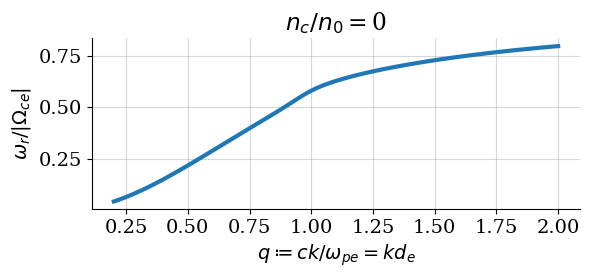

In [12]:
fig, ax = plt.subplots(figsize=(6, 3))
ax.plot(q_vec, sol_.real, linewidth=3, color="tab:blue")
ax.set_ylabel('$\omega_r/|\Omega_{ce}|$')
ax.set_xlabel(r'$q\coloneq ck/ \omega_{pe} = k d_{e}$')
ax.grid(alpha=0.5)
ax.set_title(r"$n_{c}/n_{0}=$" + str(1-delta))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.tight_layout()
plt.savefig("figs/fini_2020/whistler_vadim_nc_n0_20_21_wr.png", dpi=300, bbox_inches='tight')

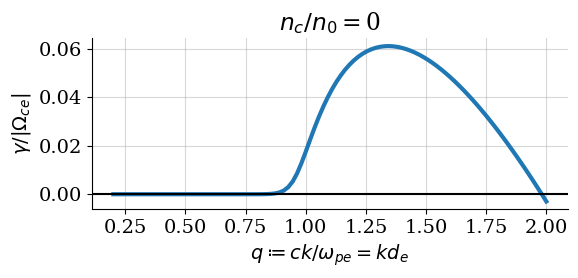

In [13]:
fig, ax = plt.subplots(figsize=(6, 3))
ax.plot(q_vec, sol_.imag, color="tab:blue", linewidth=3)
ax.set_ylabel('$\gamma/|\Omega_{ce}|$', rotation=90)
ax.set_xlabel(r'$q\coloneq ck/ \omega_{pe} = kd_{e}$')
ax.set_title(r"$n_{c}/n_{0}=$" + str(1-delta))
ax.grid(alpha=0.5)
ax.axhline(0, color="k")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.tight_layout()
plt.savefig("figs/fini_2020/whistler_vadim_nc_n0_20_21_gamma.png", dpi=300, bbox_inches='tight')

\begin{align*}
    \frac{\mathrm{d}\beta_{\perp c}}{\mathrm{d} \tau} &= -2 \int_{0}^{\infty} \frac{\mathcal{E}(q, \tau)}{q^2} \left((2A_{c} + 1)\mathrm{Im}\{z\} + \mathrm{Im}\{(2 i \mathrm{Im}\{z\} -1)\eta_{c}Z(\xi_{c}^{1}) \} \right), \\ 
    \frac{\mathrm{d}\beta_{\| c}}{\mathrm{d} \tau} &= 4 \int_{0}^{\infty} \frac{\mathcal{E}(q, \tau)}{q^2} \left( (A_{c} + 1) \mathrm{Im}\{z\} + \mathrm{Im} \{(z-1) \eta_{c} Z(\xi_{c}^{1})  \} \right) \mathrm{d} q,\\
    \frac{\mathrm{d}\beta_{\perp h}}{\mathrm{d} \tau} &=-2 \int_{0}^{\infty} \frac{\mathcal{E}(q, \tau)}{q^2} \left((2A_{h} + 1)\mathrm{Im}\{z\} + \mathrm{Im}\{(2 i \mathrm{Im}\{z\} -1)\eta_{h}Z(\xi_{h}^{1}) \} \right), \\
     \frac{\mathrm{d}\beta_{\| h}}{\mathrm{d} \tau} &=4 \int_{0}^{\infty} \frac{\mathcal{E}(q, \tau)}{q^2} \left( (A_{h} + 1) \mathrm{Im}\{z\} + \mathrm{Im} \{(z-1) \eta_{h} Z(\xi_{h}^{1})  \} \right) \mathrm{d} q,\\
    \partial_{\tau} \mathcal{E}(q, \tau) &= 2 \mathrm{Im}\{z\} \mathcal{E}(q, \tau),  
\end{align*}

In [14]:
def dB_dt(gamma, B_vec):
    return 2*gamma*B_vec

In [15]:
def dbetaperp_dt(A, q_vec, B_vec, z_vec, dq, beta_par):
    # Eq. (2) rhs
    rhs = np.zeros(len(q_vec)) 
    for ii in range(len(q_vec)):
        # phase velocity normalized 
        xi_1_e = xi_1(z=z_vec[ii], q=q_vec[ii], beta_par=beta_par) 
        eta_e = eta(z=z_vec[ii], A=A, q=q_vec[ii], beta_par=beta_par)
        # rhs 
        rhs[ii] = (B_vec[ii] / (q_vec[ii]**2)) *(z_vec[ii].imag * (2 * A + 1) + (Z(xi=xi_1_e)*(2*1j*z_vec[ii].imag-1)*(eta_e)).imag)
    return - 2 * np.sum((rhs[:-1] + rhs[1:]) * 0.5 * dq) # trapezoidal rule

In [16]:
def dbetapar_dt(A, q_vec, B_vec, z_vec, dq, beta_par):
    # Eq. (3) rhs
    rhs =  np.zeros(len(q_vec))  
    for ii in range(len(q_vec)):
        # phase velocity normalized 
        xi_1_e = xi_1(z=z_vec[ii], q=q_vec[ii], beta_par=beta_par) 
        eta_e = eta(z=z_vec[ii], A=A, q=q_vec[ii], beta_par=beta_par)
        # rhs 
        rhs[ii] = (B_vec[ii] / (q_vec[ii]**2)) *(z_vec[ii].imag * (A + 1) + (Z(xi=xi_1_e)*(z_vec[ii] -1)*(eta_e)).imag)
    return  4 * np.sum((rhs[:-1] + rhs[1:]) * 0.5 * dq) # trapezoidal rule

In [17]:
def dydt(t, f, q_vec, delta, beta_par_i):
    A_c = f[0]/f[1]-1
    A_h = f[2]/f[3]-1
    # dispersion solver
    z_vec = get_z_vec(q_vec, A_c=A_c, beta_par_c=f[1], A_h=A_h, beta_par_h=f[3], delta=delta, beta_par_i=beta_par_i)

    # cold 
    # beta perpendicular 
    rhs_beta_perp_c = dbetaperp_dt(A=A_c, q_vec=q_vec, B_vec=f[4:], z_vec=z_vec, dq=q_vec[1]-q_vec[0], beta_par=f[1])
    # beta parallel
    rhs_beta_par_c =  dbetapar_dt(A=A_c,  q_vec=q_vec, B_vec=f[4:], z_vec=z_vec, dq=q_vec[1]-q_vec[0], beta_par=f[1])

    # hot 
    # beta perpendicular 
    rhs_beta_perp_h = dbetaperp_dt(A=A_h, q_vec=q_vec, B_vec=f[4:], z_vec=z_vec, dq=q_vec[1]-q_vec[0], beta_par=f[3])
    # beta parallel
    rhs_beta_par_h =  dbetapar_dt(A=A_h,  q_vec=q_vec, B_vec=f[4:], z_vec=z_vec, dq=q_vec[1]-q_vec[0], beta_par=f[3])

    
    # magnetic energy 
    rhs_B = dB_dt(gamma=z_vec.imag, B_vec=f[4:])
    return np.concatenate(([rhs_beta_perp_c], [rhs_beta_par_c], [rhs_beta_perp_h], [rhs_beta_par_h], rhs_B))

In [18]:
result = scipy.integrate.solve_ivp(fun=dydt, 
                                   t_span=[0, t_max], 
                                   y0=np.concatenate(([beta_perp_c_init], [beta_par_c_init], [beta_perp_h_init], [beta_par_h_init], dB_init)), 
                                   args=(q_vec, delta, beta_par_i_init),
                                   atol=1e-6, rtol=1e-6, method='BDF')

In [19]:
# Vadim PIC solution 
# nc = 0
t_PIC = np.load("data/beta0.03/nc_0/spectrum_in_time/t_nc_0.npy")

pzz_eC = np.load("data/beta0.03/nc_0/spectrum_in_time/pzz_eC_nc_0.npy")
pxx_eC = np.load("data/beta0.03/nc_0/spectrum_in_time/pxx_eC_nc_0.npy")
pyy_eC = np.load("data/beta0.03/nc_0/spectrum_in_time/pyy_eC_nc_0.npy")

# # nc/nh = 20
# t_PIC = np.load("data/beta0.03/nc_nh_20_to_1/spectrum_in_time/t_nc_20_to_1.npy")

# pzz_eC = np.load("data/beta0.03/nc_nh_20_to_1/spectrum_in_time/pzz_eC_nc_20_to_1.npy")
# pxx_eC = np.load("data/beta0.03/nc_nh_20_to_1/spectrum_in_time/pxx_eC_nc_20_to_1.npy")
# pyy_eC = np.load("data/beta0.03/nc_nh_20_to_1/spectrum_in_time/pyy_eC_nc_20_to_1.npy")

betaC_par = (2*pzz_eC/B0**2)/delta
betaC_perp = ((pxx_eC+pyy_eC)/B0**2)/delta

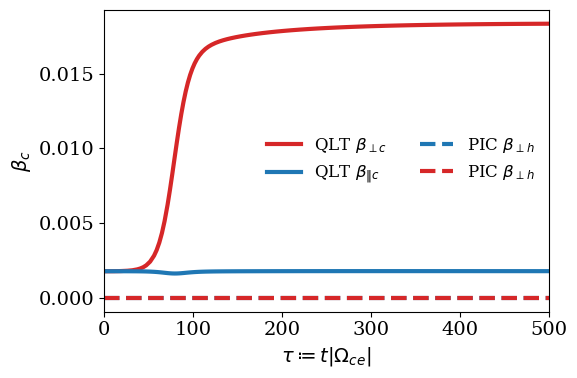

In [20]:
fig, ax = plt.subplots(figsize=(6, 4))

ax.plot(result.t, result.y[0], ls="-", color="tab:red", label=r"QLT $\beta_{\perp c}$", linewidth=3)
ax.plot(result.t, result.y[1], ls="-", color="tab:blue", label=r"QLT $\beta_{\| c}$", linewidth=3)

ax.plot(t_PIC, betaC_par, ls="--", color="tab:blue", label=r"PIC $\beta_{\perp h}$", linewidth=3)
ax.plot(t_PIC, betaC_perp, ls="--", color="tab:red", label=r"PIC $\beta_{\perp h}$", linewidth=3)

ax.set_xlabel(r'$\tau \coloneq t|\Omega_{ce}|$')
ax.set_ylabel(r'$\beta_{c}$')

ax.set_xlim(0, 500)
legend = ax.legend(loc='center right', ncols=2, fancybox=False, shadow=False, fontsize=12)
legend.get_frame().set_alpha(0)

plt.tight_layout()
plt.savefig("figs/fini_2020/fini_run1_cold_beta.png", dpi=300, bbox_inches='tight')

In [21]:
# Vadim PIC solution 
# nc = 0
t_PIC = np.load("data/beta0.03/nc_0/spectrum_in_time/t_nc_0.npy")

pzz_eH = np.load("data/beta0.03/nc_0/spectrum_in_time/pzz_eH_nc_0.npy")
pxx_eH = np.load("data/beta0.03/nc_0/spectrum_in_time/pxx_eH_nc_0.npy")
pyy_eH = np.load("data/beta0.03/nc_0/spectrum_in_time/pyy_eH_nc_0.npy")

# # nc/nh = 20
# t_PIC = np.load("data/beta0.03/nc_nh_20_to_1/spectrum_in_time/t_nc_20_to_1.npy")

# pzz_eH = np.load("data/beta0.03/nc_nh_20_to_1/spectrum_in_time/pzz_eH_nc_20_to_1.npy")
# pxx_eH = np.load("data/beta0.03/nc_nh_20_to_1/spectrum_in_time/pxx_eH_nc_20_to_1.npy")
# pyy_eH = np.load("data/beta0.03/nc_nh_20_to_1/spectrum_in_time/pyy_eH_nc_20_to_1.npy")

betaH_par = (2*pzz_eH/B0**2)/delta
betaH_perp = ((pxx_eH+pyy_eH)/B0**2)/delta

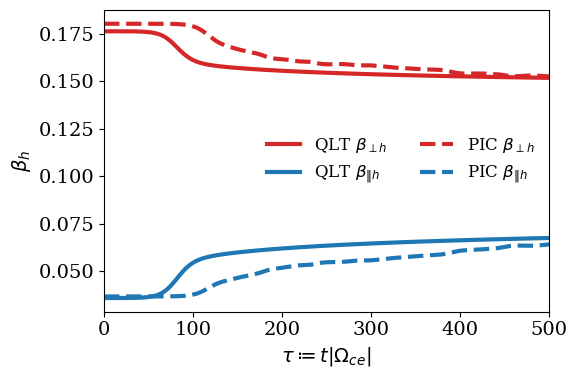

In [22]:
fig, ax = plt.subplots(figsize=(6, 4))

ax.plot(result.t, result.y[2], ls="-", color="tab:red", label=r"QLT $\beta_{\perp h}$", linewidth=3)
ax.plot(result.t, result.y[3], ls="-", color="tab:blue", label=r"QLT $\beta_{\| h}$", linewidth=3)

ax.plot(t_PIC, betaH_perp, ls="--", color="tab:red", label=r"PIC $\beta_{\perp h}$", linewidth=3)
ax.plot(t_PIC, betaH_par, ls="--", color="tab:blue", label=r"PIC $\beta_{\| h}$", linewidth=3)

ax.set_xlim(0, t_max)

ax.set_xlabel(r'$\tau \coloneq t|\Omega_{ce}|$')
ax.set_ylabel(r'$\beta_{h}$')

legend = ax.legend(loc='center right', ncols=2, fancybox=False, shadow=False, fontsize=12)
legend.get_frame().set_alpha(0)


plt.tight_layout()
plt.savefig("figs/fini_2020/fini_run1_hot_beta.png", dpi=300, bbox_inches='tight')

In [42]:
# Vadim PIC solution 
# nc = 0
t_PIC = np.load("data/beta0.03/nc_0/spectrum_in_time/t_nc_0.npy")
dB_PIC = np.load("data/beta0.03/nc_0/spectrum_in_time/dB2_nc_0.npy")

# nc/nh = 20
#t_PIC = np.load("data/beta0.03/nc_nh_20_to_1/spectrum_in_time/t_nc_20_to_1.npy")
#dB_PIC = np.load("data/beta0.03/nc_nh_20_to_1/spectrum_in_time/dB2_nc_20_to_1.npy")


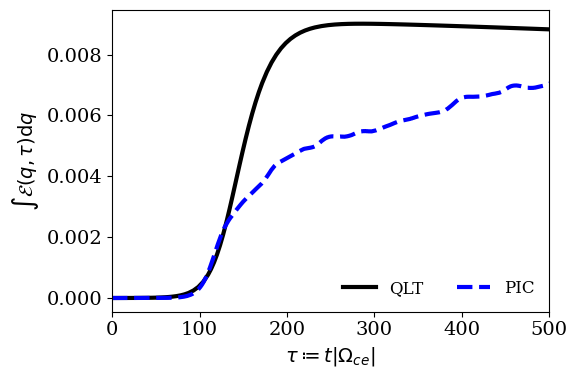

In [43]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(result.t,np.sum(result.y[4:, :], axis=0)*(q_vec[1]-q_vec[0]), color="black", linewidth=3, label="QLT")
ax.plot(t_PIC, dB_PIC, color="blue", linewidth=3, ls="--", label="PIC")

# ax.set_yscale("log")
#ax.set_yticks([0, 2e-3, 4e-3, 6e-3])
ax.set_xlabel(r'$\tau \coloneq t|\Omega_{ce}|$')
ax.set_ylabel(r'$\int \mathcal{E}(q, \tau) \mathrm{d} q$')

ax.set_xlim(0, 500)

legend = ax.legend(loc='lower right', ncols=3, fancybox=False, shadow=False, fontsize=12)
legend.get_frame().set_alpha(0)

plt.tight_layout()
plt.savefig("figs/fini_2020/fini_run1_dB.png", dpi=300, bbox_inches='tight')

Text(0.5, 1.0, '$\\mathcal{E}(q, \\tau)$')

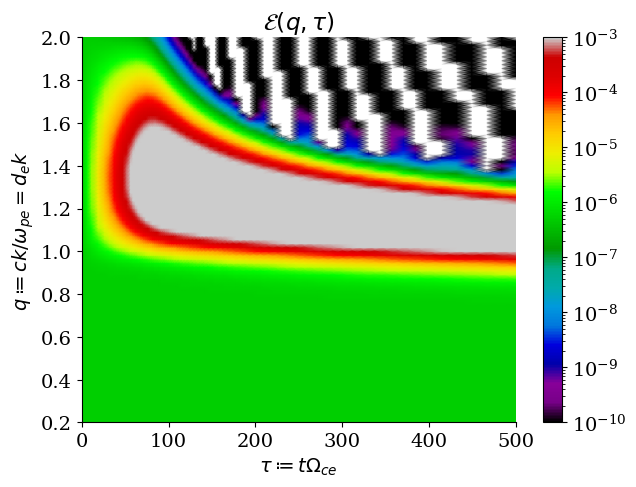

In [159]:
fig, ax = plt.subplots(figsize=(7, 5))
pos = ax.pcolormesh(result.t, q_vec, result.y[4:], cmap="nipy_spectral", norm=matplotlib.colors.LogNorm(vmin=1e-10, vmax=1e-3),shading='gouraud')
cbar = fig.colorbar(pos)

ax.set_xlabel(r'$\tau \coloneq t\Omega_{ce}$')
ax.set_ylabel(r'$q \coloneq ck/\omega_{pe}  = d_{e} k$')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_title(r"$\mathcal{E}(q, \tau)$")